In [4]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import awkward as ak
import seaborn
import RA_funcs as rf
from scipy.signal import find_peaks

imports work


<!-- <span style="font-family: arial; font-size:25px; color:pink">

Open ROOT file and extract data -->

In [5]:
# hit_data_1096 = rf.get_ROOT_data_zip("TB_FIRE_1096_hits.root")

hit_data_1101 = rf.get_ROOT_data_zip("TB_FIRE_1101_hits.root")

# hit_data_1056 = rf.get_ROOT_data_zip("TB_FIRE_1056_hits.root")

# hit_data_1057 = rf.get_ROOT_data_zip("TB_FIRE_1057_hits.root")

# hit_data_1079 = rf.get_ROOT_data_zip("TB_FIRE_1079_hits.root")

TB_FIRE_1101_hits.root finished


<!-- <span style="font-family: arial; font-size:25px; color:pink">

Hit Counts and Amp in Single Planes -->

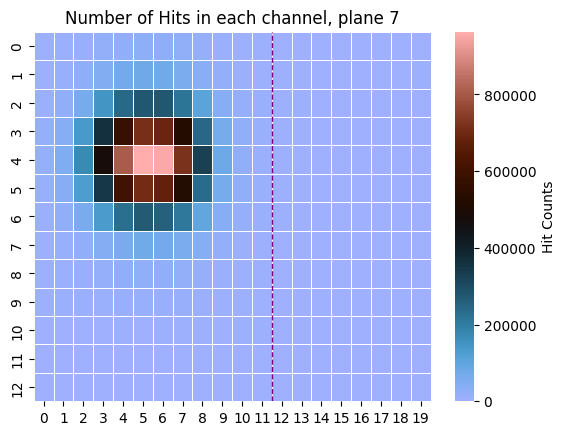

In [ ]:
# rf.hits_amount_colormap_single_plane(hit_data_1101, 7)

In [ ]:
rf.hits_amount_colormap_single_plane(hit_data_1079, 0)

In [8]:
# rf.average_amp_colormap_single_plane(hit_data_1101, 7, cmap="managua")

In [9]:
# rf.average_amp_colormap_single_plane(hit_data_1101, 0, cmap="managua")

<!-- <span style="font-family: arial; font-size:25px; color:pink">

Shower Evolution Throughout the Sensor -->

In [10]:
# rf.single_event_evolution_amp(hit_data_1101, 54106, cmap="managua")

In [11]:
# plt.clf()   # Clear the current figure
# plt.close() # Close any open figures
# %matplotlib widget
# rf.amp_histo_single_plane(hit_data_1101,1)

In [12]:
# rf.amp_histo_single_plane_total_event(hit_data_1101,0)

In [13]:
# rf.amp_histo_single_plane_total_event(hit_data_1079,0)

In [14]:
# rf.average_amp_vs_plane(hit_data_1101)

In [15]:
# # shower initial starting points
# rf.plot_empty_first_planes(hit_data_1101)

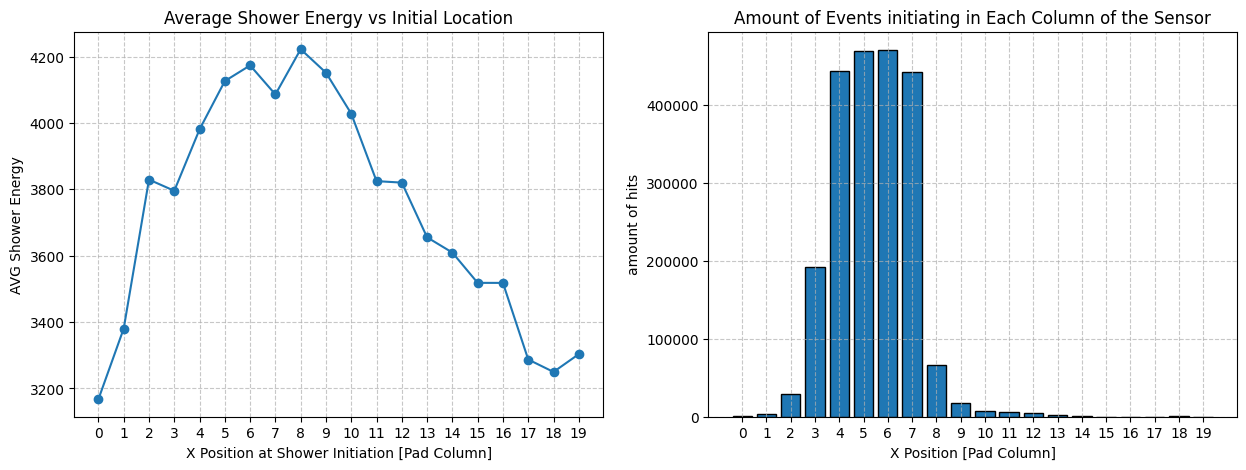

In [17]:
rf.event_shower_energy_vs_X_position(hit_data_1101)

In [31]:
# returns histogram of the amount of hits with the same energy in given X position
def shower_energy_histo_single_location(hit_data, Position):

    # get only showers starting at the first plane to identify the initial location
    plane_7 = hit_data_1101[hit_data_1101.plane == 7]
    mask = ak.num(plane_7) > 0
    first_plane_starting_events = hit_data_1101[mask]

    # determine the initial location of the shower
    # get the data on the first plane
    plane_7_clean = plane_7[mask]
    plane_7_channel = plane_7_clean.ch
    # divide by x positions
    y, x = divmod(plane_7_channel, 20) #y is the quontinent and is the row, x is the remainder and column
    x_list = x.to_list()
    x_ak = ak.Array(x_list)
    x_avg = ak.mean(x_ak, axis = 1)
    print("avg ok")
    # compute the shower energy for each event
    hit_amp_array = first_plane_starting_events.amp
    event_shower_amp_array = ak.sum(hit_amp_array, axis = 1)
    print("shower per event ok")
    # get the shower energy for the X position for all events
    amps_divided_by_class, avg_amps, classes = rf.ak_groupby(x_avg, event_shower_amp_array)
    print("groupby ok")
    # div, avg_amps, classes = ak_groupby(x_avg, event_shower_amp_array)

    amps_class_position = amps_divided_by_class[amps_divided_by_class.classes == Position]
    print("amps class at position ok")
    amps_position = amps_class_position.data
    print("amp position ok")
    amps_position_clean = amps_position[ak.num(amps_position) > 0]
    print("amp position clean ok")




    # Plot
    plt.hist(amps_position_clean[0], bins=100, range=(0,500))
    plt.show()

    





















# # Shower energy for different initial X positions of the shower
# def event_shower_energy_vs_X_position(hit_data_1101):
    
#     # get only showers starting at the first plane to identify the initial location
#     plane_7 = hit_data_1101[hit_data_1101.plane == 7]
#     mask = ak.num(plane_7) > 0
#     first_plane_starting_events = hit_data_1101[mask]

#     # determine the initial location of the shower
#     # get the data on the first plane
#     plane_7_clean = plane_7[mask]
#     plane_7_channel = plane_7_clean.ch
#     # divide by x positions
#     y, x = divmod(plane_7_channel, 20) #y is the quontinent and is the row, x is the remainder and column
#     x_list = x.to_list()
#     x_ak = ak.Array(x_list)
#     x_avg = ak.mean(x_ak, axis = 1)
    
#     # compute the shower energy for each event
#     hit_amp_array = first_plane_starting_events.amp
#     event_shower_amp_array = ak.sum(hit_amp_array, axis = 1)



#     # get the average shower energy for each X position
#     div, avg_amps, classes = ak_groupby(x_avg, event_shower_amp_array)


#     # plot
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
#     # plot the energy avg per position vs the initial X position of the shower
#     ax1.plot(classes, avg_amps, marker='o')
#     ax1.set_xticks(np.arange(0, 20))
#     ax1.grid(True, which='both', axis='x', linestyle='--', alpha=0.7)
#     ax1.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
#     ax1.set_xlabel('X Position at Shower Initiation [Pad Column]')
#     ax1.set_ylabel('AVG Shower Energy')
#     ax1.set_title('Average Shower Energy vs Initial Location')

#     # show the amounnt of hits in each plane on a bar chart
#     bins = np.arange(-0.5, 20.5, 1) 
#     ax2.hist(x_avg, bins=bins, edgecolor='black', rwidth=0.8)
#     ax2.set_xticks(np.arange(0, 20))
#     ax2.grid(True, which='both', axis='x', linestyle='--', alpha=0.7)
#     ax2.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
#     ax2.set_xlabel('X Position [Pad Column]')
#     ax2.set_ylabel('amount of hits')
#     ax2.set_title('Amount of Events initiating in Each Column of the Sensor')
    
#     plt.show()



avg ok
shower per event ok
groupby ok
amps class at position ok
amp position ok
amp position clean ok


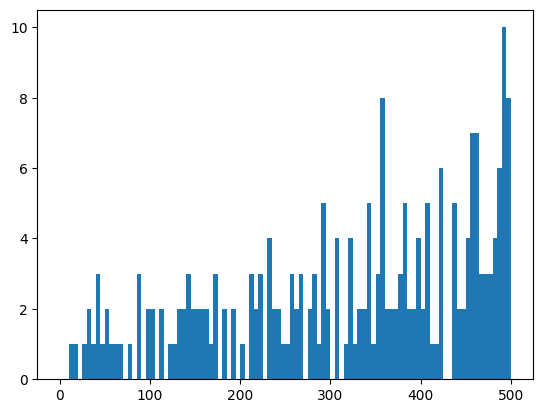

In [33]:
shower_energy_histo_single_location(hit_data_1101,5)


In [30]:
# shower_12[0]
plt.hist(shower_12[0], bins=501, range=(0,500))
plt.show()


TypeError: 'NoneType' object is not subscriptable

In [ ]:
div, avg_amps, classes = rf.ak_groupby([1,1,3,4,5], [10,20,30,40,50])
div[div.classes == 1].data

<Array [[10, 20], [], [], []] type='4 * var * int64'>